# Exploratory Data Analysis (EDA) on Retail Sales Data

#Importing necessary libraries

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [40]:
retail_sales = pd.read_csv('/content/retail_sales_dataset.csv')

# Check total rows and columns

In [41]:
retail_sales.shape

(1000, 9)

#Taking a look at the top 5 rows of the data

In [42]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Retrieving the list of actual columns

In [43]:
retail_sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

# Data Cleaning
# Check for missing values and handle


In [44]:
retail_sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Check for duplicates value

In [45]:
retail_sales.duplicated().sum()

0

Checking column types

In [46]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Assessing unique values

In [47]:
retail_sales.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

# Check only categorical columns

In [49]:
retail_sales.select_dtypes(include='object').head()

,Date,Customer ID,Gender,Product Category
0,2023-11-24,CUST001,Male,Beauty
1,2023-02-27,CUST002,Female,Clothing
2,2023-01-13,CUST003,Male,Electronics
3,2023-05-21,CUST004,Male,Clothing
4,2023-05-06,CUST005,Male,Beauty


# Check only Numerical Columns

In [50]:
retail_sales.select_dtypes(exclude='object').head()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100


# Check Outliers
# Age,	Quantity,	Price per Unit,	Total Amount

# Using Box Plot to check outliers

<Axes: ylabel='Age'>

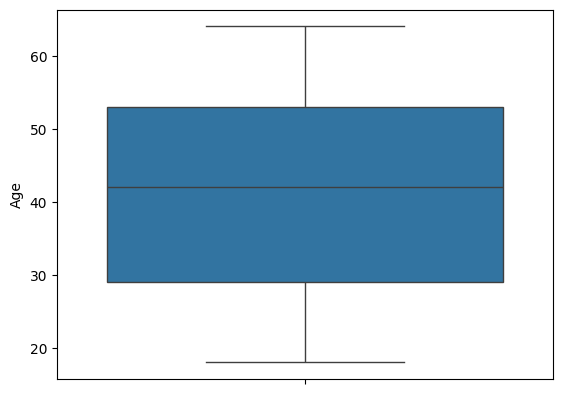

In [51]:
sns.boxplot(retail_sales['Age'])
# No Outliers

<Axes: ylabel='Quantity'>

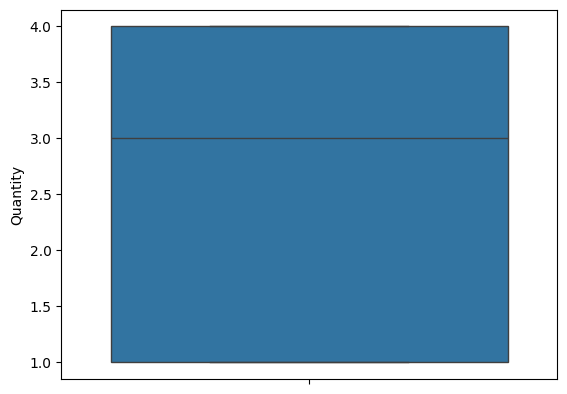

In [52]:
sns.boxplot(retail_sales['Quantity'])
# No Outliers

<Axes: ylabel='Price per Unit'>

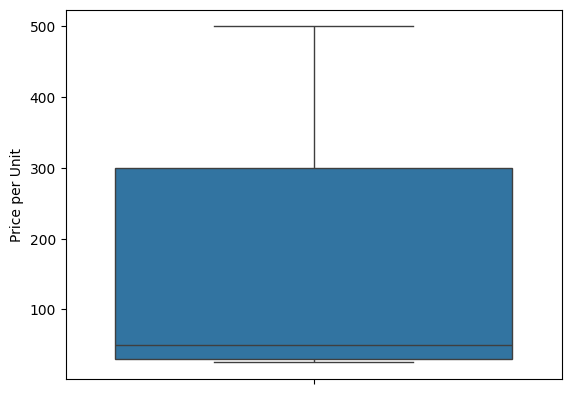

In [53]:
sns.boxplot(retail_sales['Price per Unit'])
# No Outliers

<Axes: ylabel='Total Amount'>

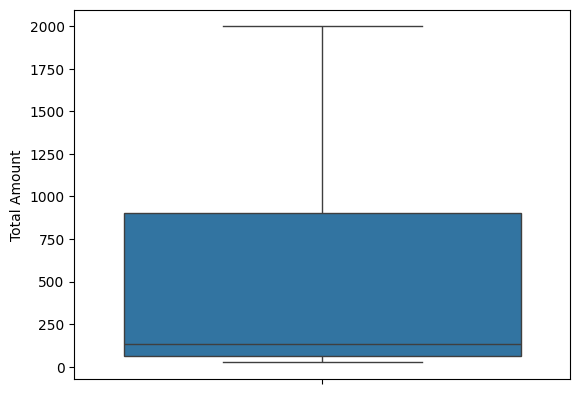

In [54]:
sns.boxplot(retail_sales['Total Amount'])
# No Outliers

# Descriptive Statistics
# Calculate basic statistics

In [55]:
basic_stats = retail_sales.describe()
print(basic_stats)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


# Time Series Analysis:
# Convert the 'Date' column to datetime format.
# Analyze sales trends over time, perhaps by aggregating sales data by month or quarter and plotting it.

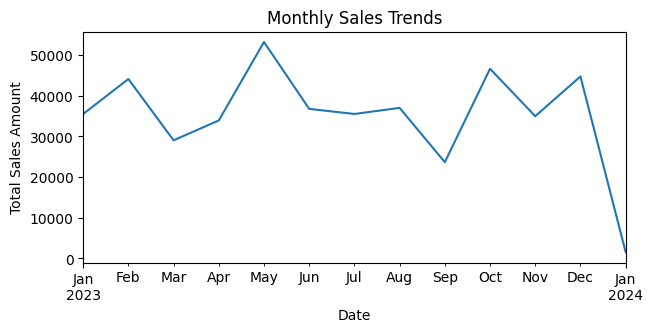

In [57]:
# Time Series Analysis
# Convert 'Date' column to datetime format
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])

# Analyze sales trends over time
sales_time_series = retail_sales.groupby(pd.Grouper(key='Date', freq='M')).sum()['Total Amount']
# Plot sales trends
plt.figure(figsize=(7, 3))
sales_time_series.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


# Customer and Product Analysis:
# Analyze customer demographics such as 'Gender' and 'Age'.
# Explore purchasing behavior by analyzing 'Product Category',
#  'Quantity', and 'Total Amount'.
#Identify popular products, customer segments, and purchase patterns.

In [58]:
# Customer and Product Analysis
# Analyze customer demographics
gender_distribution = retail_sales['Gender'].value_counts()
age_distribution = retail_sales['Age'].value_counts()

# Analyze purchasing behavior
product_sales = retail_sales.groupby('Product Category').sum()['Total Amount']
product_quantity = retail_sales.groupby('Product Category').sum()['Quantity']

print("Customer and Product Analysis:")
print("Gender Distribution:\n", gender_distribution)
print("Age Distribution:\n", age_distribution)
print("Product Sales:\n", product_sales)
print("Product Quantity:\n", product_quantity)


Customer and Product Analysis:
Gender Distribution:
 Female    510
Male      490
Name: Gender, dtype: int64
Age Distribution:
 43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: Age, dtype: int64
Product Sales:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64
Product Quantity:
 Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


# Visualization: -->
# Visualize insights through bar charts, line plots, and heatmaps.

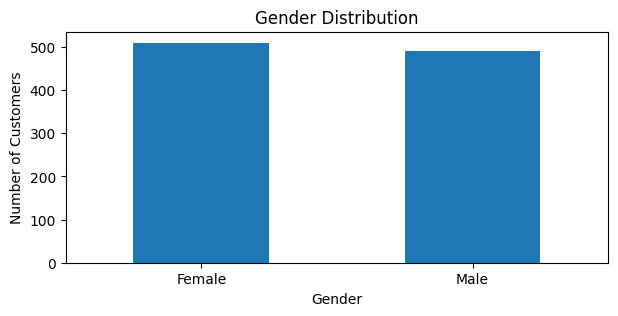

In [61]:
# Visualization
# Bar chart for gender distribution
plt.figure(figsize=(7, 3))
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()




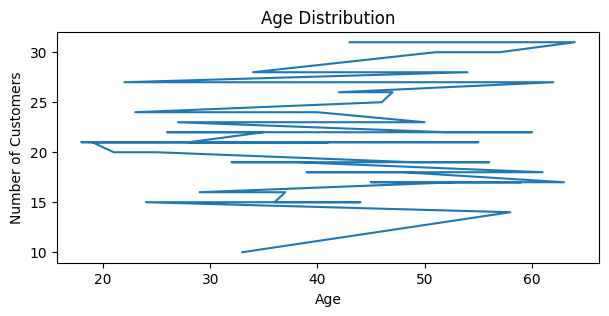

In [62]:
# Line plot for age distribution
plt.figure(figsize=(7, 3))
age_distribution.plot(kind='line')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()



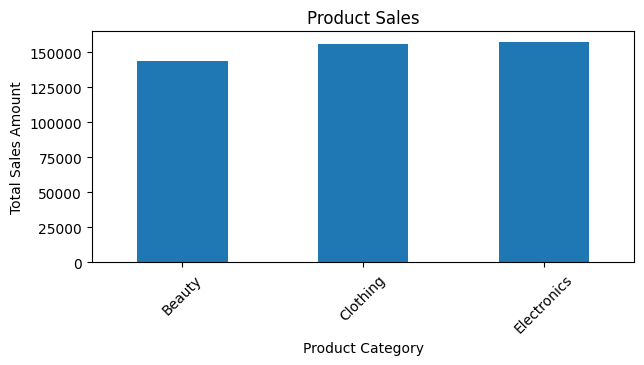

In [63]:
# Bar chart for product sales
plt.figure(figsize=(7, 3))
product_sales.plot(kind='bar')
plt.title('Product Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()



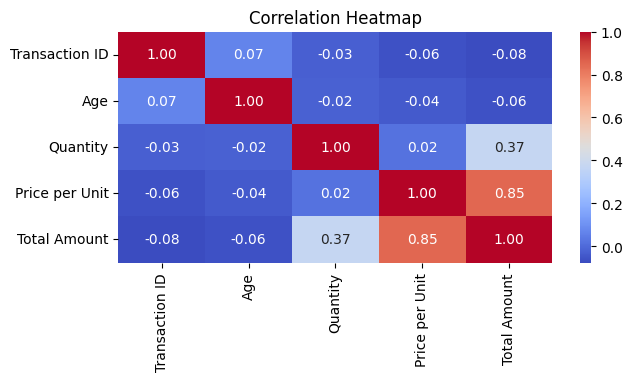

In [64]:
# Heatmap for correlation between variables
plt.figure(figsize=(7, 3))
sns.heatmap(retail_sales.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Recommendations:---->
# 1. Analyze sales trends further to identify seasonal patterns and adjust inventory accordingly.
# 2.Target marketing campaigns based on popular products and customer demographics.
# 3. Explore customer segments to tailor promotions and improve customer retention strategies.